In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


## Analyzing Rent Price in Manhattan

In [4]:
df.dtypes

rental_id             int64
rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
no_fee                int64
has_roofdeck          int64
has_washer_dryer      int64
has_doorman           int64
has_elevator          int64
has_dishwasher        int64
has_patio             int64
has_gym               int64
neighborhood         object
borough              object
dtype: object

In [5]:
rent_price = df['rent']
len(rent_price)

3539

In [12]:
print(f'Average price of rent : ${rent_price.mean()}')
print(f'Median price of rent : ${rent_price.median()}')
print(f'Maximum rental price : ${rent_price.max()}')
print(f'Minimum rental price : ${rent_price.min()}')

Average price of rent : $5138.9403786380335
Median price of rent : $4000.0
Maximum rental price : $20000
Minimum rental price : $1300


Text(0.5, 1.0, 'Distribution of Rental Price in Manhattan')

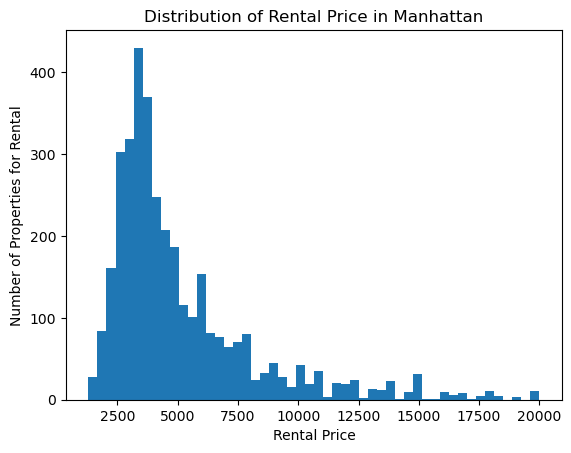

In [19]:
plt.hist(rent_price,bins=50)
plt.xlabel('Rental Price')
plt.ylabel('Number of Properties for Rental')
plt.title('Distribution of Rental Price in Manhattan')

### What proportion of NYC rentals have gym?

In [30]:
has_gym = df[df.has_gym==1]
has_gym[['rent','has_gym']]
has_gym_count = len(has_gym)
print(f'Number of Rents with gym : {has_gym_count}')
print(f'Proportion of NYC rentals with gym : {has_gym_count / len(df)}')

Number of Rents with gym : 619
Proportion of NYC rentals with gym : 0.17490816614862956


# Box plot for rent variable

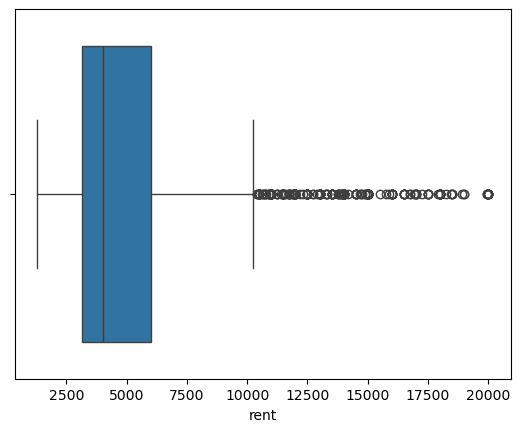

In [31]:
sns.boxplot(x='rent', data = df)
plt.show()

## Comparing histograms of rent variable by number of bins

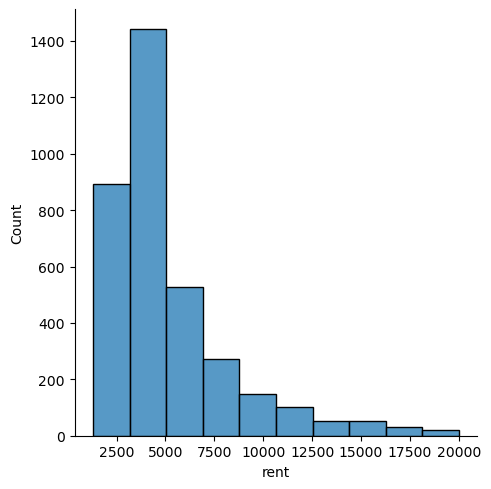

In [37]:
sns.displot(df.rent, bins=10, kde=False)
plt.show()

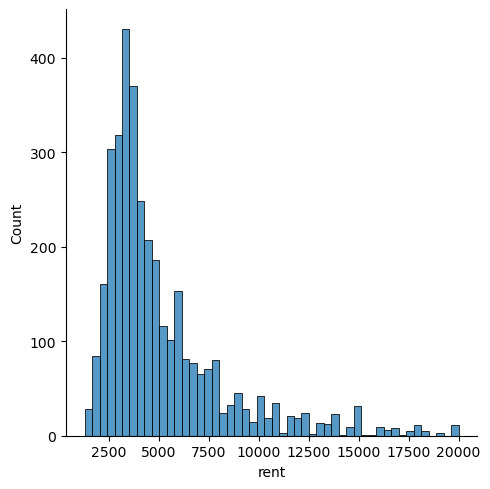

In [38]:
sns.displot(df.rent, bins=50, kde=False)
plt.show()

Signature:
sns.displot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    weights=None,
    kind='hist',
    rug=False,
    rug_kws=None,
    log_scale=None,
    legend=True,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing distribution plots onto a FacetGrid.

This function provides access to several approaches for visualizing the
univariate or bivariate distribution of data, including subsets of data
defined by semantic mapping and faceting across multiple subplots. The
``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

Additionally, a :func:`rugplot` can be added to any kind of plot to show
individual 